# K-fold Cross Validation

## Loading training data

In [1]:
#loading training data
train_data <- read.csv("Task1A_train.csv")
train_label <- train_data[1:nrow(train_data),2] #creating the training labels

In [2]:
#printing out first 5 rows of train data and labels
head(train_data)
head(train_label)

x1,y
1960.0,0.71
1960.5,0.85
1961.0,0.61
1961.5,0.92
1962.0,0.72
1962.5,0.92


[1] 0.71 0.85 0.61 0.92 0.72 0.92

In [3]:
#checking the dimensions of train dataset
dim(train_data)

[1] 42  2

## Implementation of KNN regressor function

As mentioned in the question 1, we implement a function of KNN regressor

In [4]:
#function to calcuate the average of the neighbour's values
avg_neighbours <- function(x) {
    avg <- mean(x)
    return(avg)
}

#KNN regressor function
knn_regressor <- function(train_data, train_label, test_data, K=3){
    
    train_len <- nrow(train_data) #length of train data
    test_len <- nrow(test_data) #length of test data
    
    #distance matrix which calculates the distance between data points
    dist <- as.matrix(dist(rbind(test_data, train_data), method= "euclidean"))[1:test_len, (test_len+1):(test_len+train_len)]
    
    regressed_vals <- c() #empty vector to store regressed values
    
    #iterating through the test data points
    for (i in 1:test_len){
        #finding the K nearest neighbours indices
        ind <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2] 
        
        d <- avg_neighbours(train_label[ind]) #calling the avg_distance function, argument as nearest training points
        regressed_vals <- c(regressed_vals, d) #storing the calcuated regressed value int he vector created
    }
    
   return(regressed_vals) #returns the regressed values

}

## Implementation of L-fold cross validation

The function cv_fold takes 4 arguments train_data, train_label, number of folds(numfold) and neighbourhood size(K). It returns errors for different folds of the training data

In [5]:
#L-fold cross validation function
cv_fold <- function(train_data, train_label, numfold = 10, K = 10){

folds <- cut(seq(1,nrow(train_data)), breaks=numfold, labels=FALSE) #creating folds of training data from 1 to 10
    
error <- data.frame('numfold' = 1:10, 'train_error' = rep(0,10)) #dataframe to store error values for each fold

#for each fold
for(i in 1:numfold){
    #Generating the indices by fold using the which() function 
    train_index <- which(folds==i,arr.ind=TRUE)
    
    #splitting the training data using indices to test data and train data
    testData <- train_data[train_index, ] 
    trainData <- train_data[-train_index, ]
    
    #splitting the training lables using indices to test labels and train labels
    trainLabel <- train_label[-train_index]
    testLabel <- train_label[train_index]
    
    #calling the knn regressor function which returns the regressed values
    y_test <- knn_regressor(trainData, trainLabel, testData, K) 
    
    #calcuation of root mean square error and storing it in dataframe created above
    error[i, 'train_error'] <- sqrt(mean((y_test - testLabel)^2)) 
}
    return(error) #returns errors for each fold
}

In [6]:
cv_fold(train_data, train_label, numfold = 10, K = 3) #just for an example

numfold,train_error
1,0.1896781
2,0.2117847
3,0.2937355
4,0.5275915
5,0.7086960
6,0.7223399
7,0.4487483
8,0.8180159
9,1.0035437
10,4.5776107


## Computation of average error for K = 1 to 20 

In [7]:
#creating a dataframe with columns K=1 to 20, and training error set to zeroes
error_df <- data.frame('K'=1:20, 'train_error'= rep(0,20))

#for each K from 1 to 20
for (k in 1:20){
    
    #calculation of errors for each K for 10 folds 
    errors <- cv_fold(train_data, train_label, numfold = 10, K=k) # calling cv_fold() function with numfold set to 10.
    error_df[k, 'train_error'] <- mean(errors[,2]) #calcuation of average error for each K        
}
error_df #printing the error dataframe

K,train_error
1,0.8758878
2,0.9984137
3,0.9501744
4,0.8946280
5,0.9225935
6,0.9100440
7,0.9477006
8,0.9747168
9,0.9750358
10,1.0156749


## Loading required libraries

In [8]:
library(reshape) #used to restructure the data in dataframe
library(ggplot2) #used to plot graphs

Warning message:
"package 'reshape' was built under R version 3.4.4"

## Plotting Average Error vs 1/K

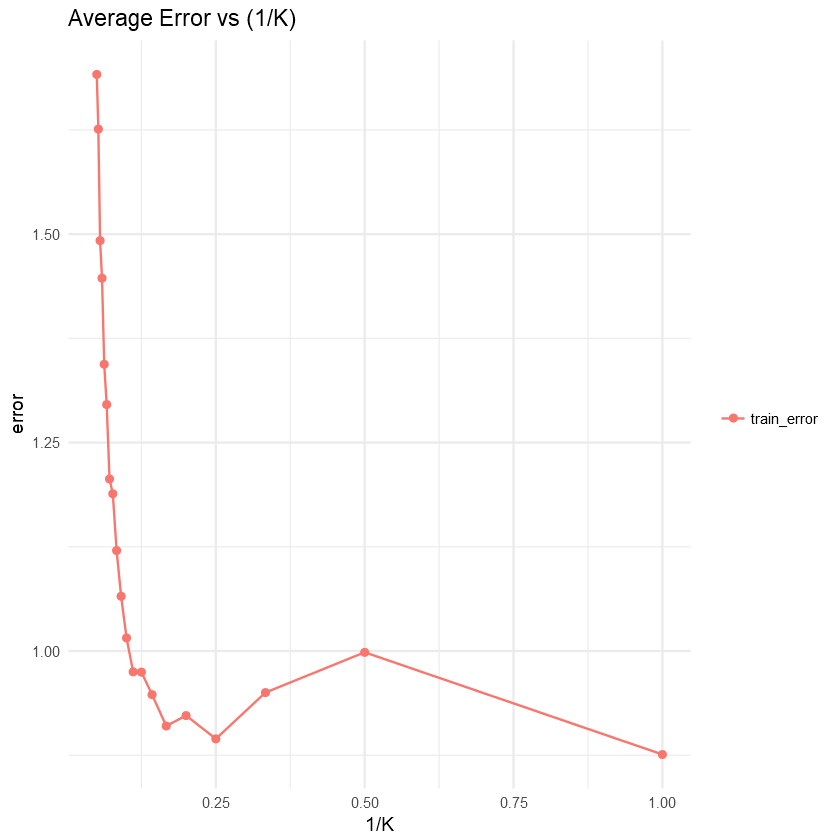

In [9]:
#reshaping the data frame
error_melt <- melt(error_df, id ='K')
names(error_melt) <- c('K','type','error') #assigning column names

#plotting RMSE vs 1/K
ggplot(data=error_melt, aes(x=1/K, y=error, color=type)) + geom_line() + geom_point() +
       scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
       ggtitle("Average Error vs (1/K)")

In [ ]:
#calculating optimum value of K
min_error = which(error_df[,2] == min(error_df[,2]))
min_error

## Insights

So, from the plot and above section, we can say that the optimum value of K is 1.